In [1]:
import sys
import pyccl as ccl
import pickle
import camb
from skylens import *
sys.path.insert(0,'./')
# from importlib import reload

In [2]:
LC,scheduler_info=start_client(local_directory='../temp/SSC_comp/')

error in creating local directory:  ../temp/SSC_comp/ module 'os' has no attribute 'mkdirs'


# Power Spectrum covariance

In [3]:
#setup parameters
lmax_cl=5000
lmin_cl=2
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=40
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=True
tidal_SSV_cov=False
Tri_cov=True

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)

##  Test with 1 redshift bin

In [4]:
f_sky=0.35

In [5]:
z0=1 #1087
zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=True,unit_win=True,f_sky=f_sky)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:82: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide


power spectra camb_pk
Win gen: step size 768 True False 767 31.0
Window done. Size: 0.0


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/survey_utils.py:127: RuntimeWarning: invalid value encountered in sqrt


In [6]:
zs_bin1[0].keys()

dict_keys(['z', 'dz', 'nz', 'ns', 'W', 'pz', 'pzdz', 'Norm', 'b1', 'bz1', 'AI', 'AI_z', 'mag_fact', 'shear_m_bias', 'lm', 'k_max', 'window_cl0', 'window'])

/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/verafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:922: MatplotlibDepr

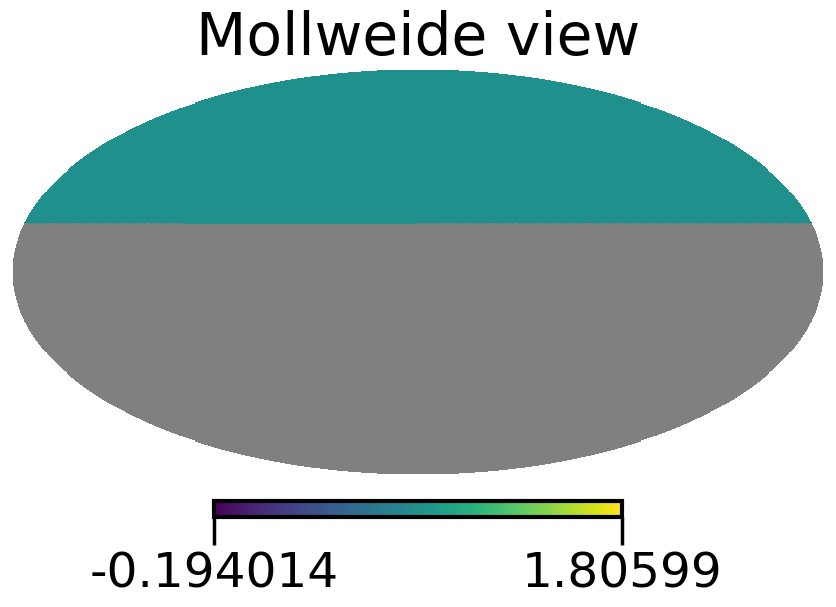

In [7]:
hp.mollview(zs_bin1[0]['window'])

In [8]:
# bin_cl=False
if not bin_cl:
    lb=l0
    l=l0

In [9]:
from astropy.cosmology import Planck15 as cosmo


In [10]:
import pyccl as ccl
cosmo_params={'h': 0.6774,
 'Omb': 0.0486,
 'Omd': 0.2589,
 's8': 0.817,
 'Om': 0.3075,
 'As': 2.12e-09,
 'mnu': 0.06,
 'Omk': 0.0,
 'tau': 0.06,
 'ns': 0.965,
 'w': -1,
 'wa': 0,
 'Oml': 0.6925}

In [11]:
use_window=False

In [12]:
power_spectra_kwargs={'pk_func':'baryon_pk'}

In [13]:
#on nersc try /global/cscratch1/sd/sukhdeep/temp/
# only needed if you are playing with window calculations, kappa_win below
wigner_files={}
wigner_files[0]= 'temp/dask_wig3j_l6500_w2100_0_reorder.zarr'
wigner_files[2]= 'temp/dask_wig3j_l6500_w1100_2_reorder.zarr'

In [14]:
#use all ell
kappa0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       scheduler_info=scheduler_info
                                       )

#to test calculation using proper windows, in SSC.
# kappa_win=cov_3X2(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
#                                        use_window=True,Tri_cov=Tri_cov,store_win=True,
#                                        SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
#                                        wigner_files=wigner_files)

In [15]:
bi=(0,0)

In [16]:
#get compute graphs
%time cl0G=kappa0.cl_tomo() 
# %time cl0G_win=kappa_win.cl_tomo() 

In [17]:
%time cl0=cl0G['stack'].compute()
# %time cl0_win=cl0G_win['stack'].compute()
# %time clB=clBG['stack'].compute()

<ipython-input-18-3142aa295c25>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')


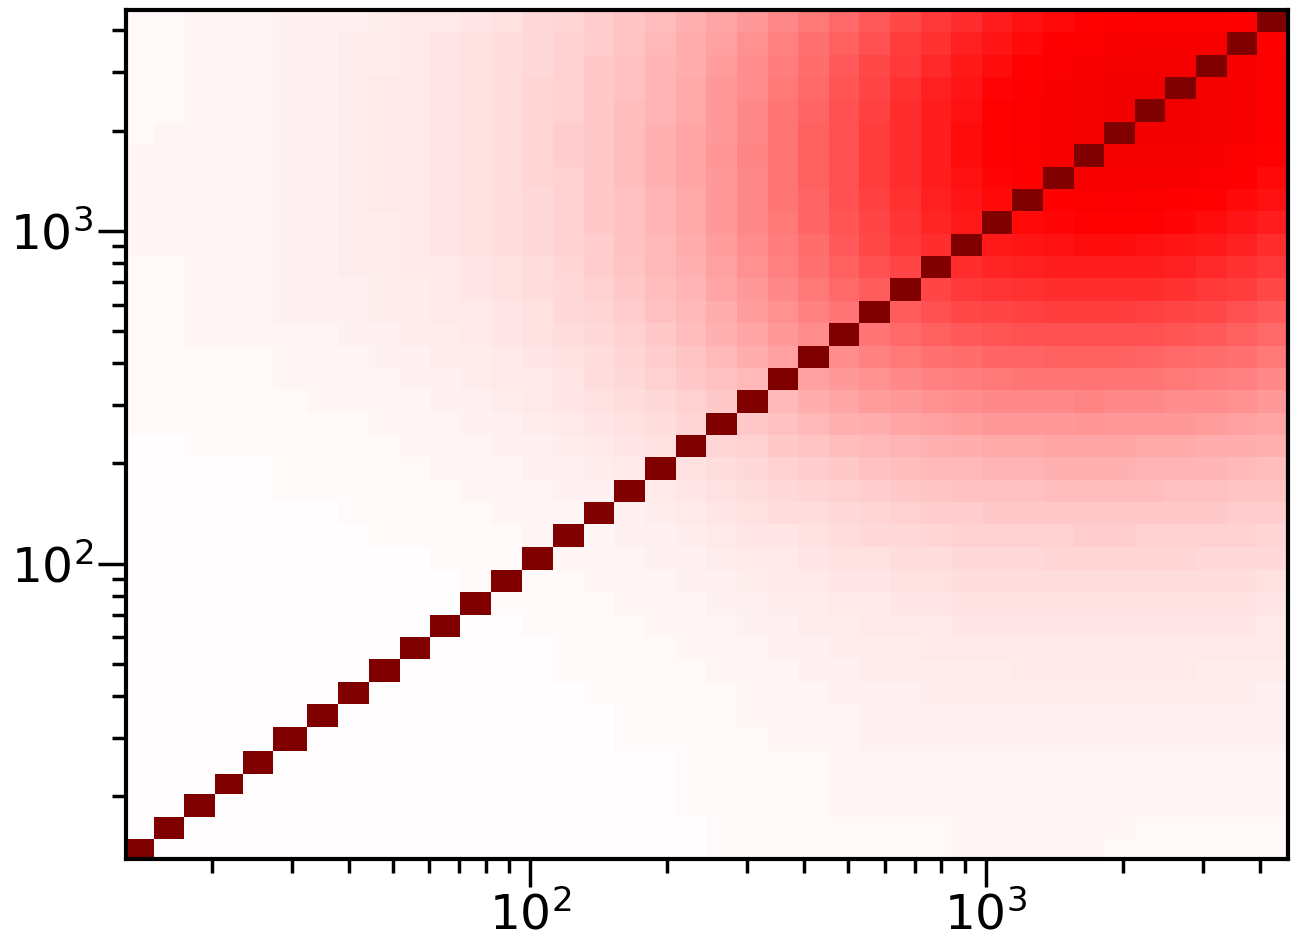

In [18]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

In [19]:
# compute signal/noise
cov_inv=np.linalg.inv(cl0['cov'])
SN2=(np.dot(cl0['cl_b'],np.dot(cov_inv,cl0['cl_b'])))
np.sqrt(SN2)

KeyError: 'cl_b'

In [ ]:
#again get Cl and cov, this time by referencing the particular bin
cl0={}
corr=('shear','shear')
%time cl0['cl0']=cl0G['cl'][corr][(0,0)].compute()
%time cl0['cl']=cl0G['cl_b'][corr].compute()
%time cl0['cov']=cl0G['cov'][corr+corr][(0,0,0,0)].compute()#kappa0.compute_cov_tomo(cl0G['cov'])

In [ ]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov']['final_b'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

In [ ]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov']['G_b']+cl0['cov']['SSC_b'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

In [ ]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov']['G_b']+cl0['cov']['Tri_b'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

In [ ]:
corr2=kappa0.cov_utils.corr_matrix(cl0['cov']['SSC_b'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

In [ ]:
cl_t=cl0['cl'][(0,0)]
plot(lb,cl_t)
# hlines(1,1,2000)
xscale('log')
yscale('log')
xlabel('$\ell$')
ylabel('$C_\ell$')
show()

In [ ]:
kappa0.cov_utils.Om_W

In [ ]:
cov0=cl0['cov']#[(0,0,0,0)]
# cov0_win=cl0_win['cov']#[(0,0,0,0)]

f=1e4
plot(lb,np.diag(cov0['G_b'])/cl_t**2*f,label='Gaussian')
plot(lb,np.diag(cov0['SSC_b'])/cl_t**2*f,label='SSC')
plot(lb,np.diag(cov0['Tri_b'])/cl_t**2*f,label='Tri')
# plot(lb,np.diag(cov0_win['SSC_b'])/cl_t**2*f,label='SSC_win')
# plot(lb,np.diag(cov0['SSC_dk'])/cl_t**2*f)
xscale('log')
yscale('log')
xlim(20,3000)
xlabel(r'$\ell$')
ylabel(r'$\frac{\delta C_\ell^2}{C_\ell^2}\times'+str(f)+'$')
legend()

In [ ]:
kappa0.CTR.N

In [ ]:
kappa0.CTR.k

In [ ]:
plot(kappa0.cov_utils.window_l,kappa0.cov_utils.Win**2,'--')
plot(hp.alm2cl(zs_bin1[0]['window_alm']))
loglog()
ylim(.0001,10)

In [ ]:
def matrix_cut(mat=[],x=[]):
    m=mat[x]
    N=sum(x)
    m2=np.zeros((N,N))
    j=0
    for i in m:
        m2[j]=i[x]
        j=j+1
    return m2

def SN_cum(cov=[],lb=[],cl=[],diag=False,lmin=2,use_hartlap=False,nsim=1000):
    sni=np.zeros_like(lb)
    for i in np.arange(len(lb)):
        if lb[i]<lmin:
            continue
        x=lb<=lb[i]
        x*=lb>lmin
        cov2_cut=matrix_cut(mat=cov,x=x)
        if diag:
            cov2_cut=np.diag(np.diag(cov2_cut))
        cov2_cut_inv=np.linalg.inv(cov2_cut)
        
        cl_i=cl[x]
        SN2=cl_i@cov2_cut_inv@cl_i
        if use_hartlap:
            SN2*=(nsim-2-x.sum())/(nsim-1)
        sni[i]=SN2
    return sni

In [ ]:
sn2={}
sn2['all']=SN_cum(cov=cl0['cov']['final_b'],cl=cl0['cl'][bi],lb=lb)
sn2['G']=SN_cum(cov=cl0['cov']['G_b'],cl=cl0['cl'][bi],lb=lb)
sn2['G_SSC']=SN_cum(cov=cl0['cov']['G_b']+cl0['cov']['SSC_b'],cl=cl0['cl'][bi],lb=lb)
sn2['G_Tri']=SN_cum(cov=cl0['cov']['G_b']+cl0['cov']['Tri_b'],cl=cl0['cl'][bi],lb=lb)

In [ ]:
plot(lb,sn2['all'])
plot(lb,sn2['G'])
plot(lb,sn2['G_SSC'])
plot(lb,sn2['G_Tri'])

loglog()
hlines(sn2['all'][-1],10,5000)
xlim(10,5000)

In [ ]:
nside=4096
wl=hp.pixwin(nside)
l=np.arange(len(wl))

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
ww=interp1d(l,wl,bounds_error=False,fill_value=0)
l2=np.arange(nside*10)
wl2=ww(l2)

In [ ]:
x=l2>l.max()
print(wl2[x],wl[-1])
lm=l2[x][0]/(1+np.sqrt(-1*np.log(wl[-1])))
# lm=l2[x][0]/(1+(-1*np.log(wl[-1])))
wl2[x]+=np.exp(-((l2[x]-lm)/lm)**2)

In [ ]:
wl.max(),wl2.max()

In [ ]:
f=(2*l+1)
plot(wl*f)
f2=(2*l2+1)
plot(wl2*f2)
plot(wl)
xscale('log')
yscale('log')
# ylim(1.e-3,1.1)
vlines(nside,1,1.e5)
vlines(nside*3,1,1.e5)
ylim(1,3.e4)

In [ ]:
kappa0.Ang_PS.clz